# Importing The Files and libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import tensorflow as tf
from sklearn.model_selection import train_test_split
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [4]:
import numpy as np
df1 = pd.read_csv('Fire_Data.csv')
df2 = pd.read_csv('Non_Fire_Data.csv')
#big_data = pd.read_csv('Data_All.csv')
df = pd.concat([df1, df2])

In [9]:
df =df.rename(columns={"Power_Lines_Proximity":"Power Lines Proximity", 
                   "ESA_Worldcover":"LULC",
                   "Forest_Density":"TCD",
                   "Forest_Road_Proximity": "Forest Road Proximity",
                   "Railroad_Proximity": "Railway Proximity",
                   "Road_Proximity": "Road Proximity",
                   "Settlement_Density": "Settlement Density",
                   "Settlement_Proximity": "Settlement Proximity",
                   "Tree_Ages": "Tree Ages",
                   "Tree_Types": "Tree Types",
                   "Water_Proximity": "Water Proximity",
                   "DEM": "Elevation",
                   "Fuels" : "Forest Type"   
                  })

labels = np.asarray(df.Fires) # Read Label Columns as numpy array for Sklearn to understand
feature_cols = ["Aspect",
                'Elevation',
                "LULC",
                "TCD",
                "Forest Type",
                "MNDWI",
                "NDVI",
                "Power Lines Proximity", 
                "Road Proximity",
                "Settlement Density",
                "Settlement Proximity",
                "Tree Types",
                "Tree Ages",
                "Forest Road Proximity",
                "Slope",
                "Water Proximity"                
                                ]

In [10]:
# CLF
labels = np.asarray(df.Fires) # Read Label Columns as numpy array for Sklearn to understand
x = df[feature_cols] #Reading Features from the selected columns in df
y = labels # Reading labels as y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) # Split the data

Excluding one feature at each turn while keeping the whole training and test sets the same to see which feature plays the most significant role in the whole analysis. Saving the accuracy results for the comparison of the feature importance

In [155]:
x_train2 = x_train.drop(['Water Proximity'], axis=1)

In [156]:
x_test2 = x_test.drop(['Water Proximity'], axis=1)

In [11]:
# ANN

Y_train = y_train
Y_test = y_test

X_train = x_train.iloc[:,0:16].values
X_test  = x_test.iloc[:,0:16].values

#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
clf = RandomForestClassifier(n_estimators = 400,
                             min_samples_split= 10,
                             min_samples_leaf = 4,
                             max_features = 'sqrt',
                             max_depth = 16,
                             bootstrap = True,
                             )
clf.fit(x_train, y_train) 
y_score = clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
prob = clf.predict_proba(x_test)

In [23]:
#conf_matrix = sklearn.metrics.confusion_matrix(y_test, predictions)
#print(conf_matrix)

acc_test = clf.score(x_test, y_test)
print ("Test Accuracy:", acc_test)

'''f1_score(y_true, y_pred, average='weighted') f1_score(y_true, y_pred, average='macro') f1_score(y_true, y_pred, average='micro')'''

y_true = y_test
y_pred = clf.predict(x_test)
y_true = y_true.tolist()
y_pred = y_pred.tolist()
f1_score(y_true, y_pred, average=None)
#calısıyor bozma
f1 = f1_score(y_true, y_pred, zero_division=1)

print ("f1 Accuracy:", f1)

Test Accuracy: 0.8828125
f1 Accuracy: 0.8059149722735676


In [24]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc',f1_m,precision_m, recall_m])

ann.fit(X_train,Y_train,batch_size=32,epochs = 100)



Epoch 1/100
112/112 [==============================] - 1s 1ms/step - loss: 0.6524 - acc: 0.6300 - f1_m: 0.4478 - precision_m: 0.5540 - recall_m: 0.4828
Epoch 2/100
112/112 [==============================] - 0s 1ms/step - loss: 0.5151 - acc: 0.7576 - f1_m: 0.4663 - precision_m: 0.8341 - recall_m: 0.3498
Epoch 3/100
112/112 [==============================] - 0s 1ms/step - loss: 0.4226 - acc: 0.8235 - f1_m: 0.6965 - precision_m: 0.7906 - recall_m: 0.6404
Epoch 4/100
112/112 [==============================] - 0s 1ms/step - loss: 0.3679 - acc: 0.8489 - f1_m: 0.7465 - precision_m: 0.8302 - recall_m: 0.6964
Epoch 5/100
112/112 [==============================] - 0s 1ms/step - loss: 0.3417 - acc: 0.8637 - f1_m: 0.7765 - precision_m: 0.8584 - recall_m: 0.7244
Epoch 6/100
112/112 [==============================] - 0s 1ms/step - loss: 0.3303 - acc: 0.8688 - f1_m: 0.7824 - precision_m: 0.8638 - recall_m: 0.7307
Epoch 7/100
112/112 [==============================] - 0s 1ms/step - loss: 0.3231 - acc:

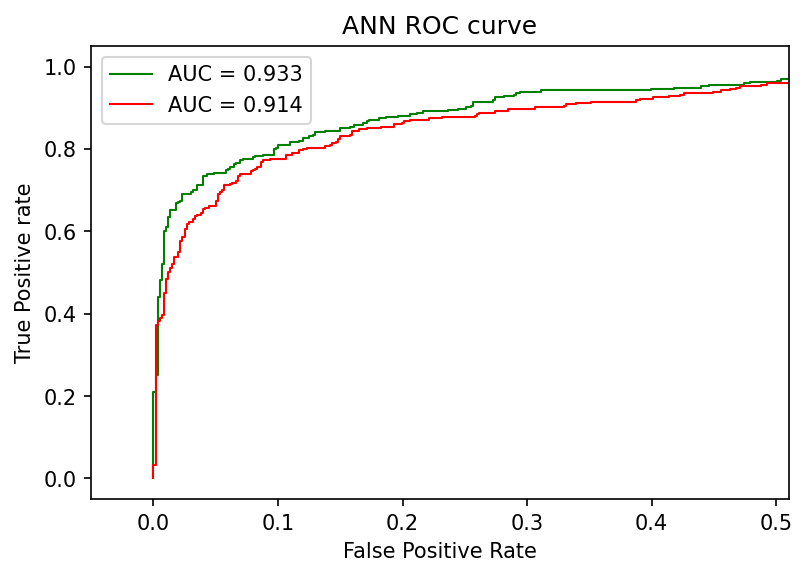

In [27]:
from sklearn import metrics
#set up plotting area
#plt.figure(0).clf()
plt.figure(dpi=150)


# plot RFROC curve

y_pred = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 3)
plt.plot(fpr,tpr,lw=1, color='green',label="AUC = "+str(auc))

# plot  ANN ROC curve


y_pred = probas = ann.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc = round(metrics.roc_auc_score(Y_test, y_pred), 3)
plt.plot(fpr,tpr,lw=1, color='red',label="AUC = "+str(auc))

#add legend marker='o', linestyle='dashed'

plt.title('ANN ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlim([-0.05, 0.51])
plt.ylim([-0.05, 1.05])
plt.legend(loc='best')
plt.savefig('ROC Curve',dpi=300);

Feature Importance can also be measured by using Sci-kit Learn built-in functions or SHAP library. But these methods can only be applied to RF, therefore leave one out analysis was conducted for both. The results were comparted with Shap values.

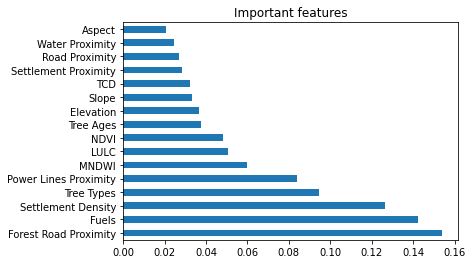

In [166]:
feat_importances = pd.Series(clf.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
pyplot.title("Important features")
pyplot.show()

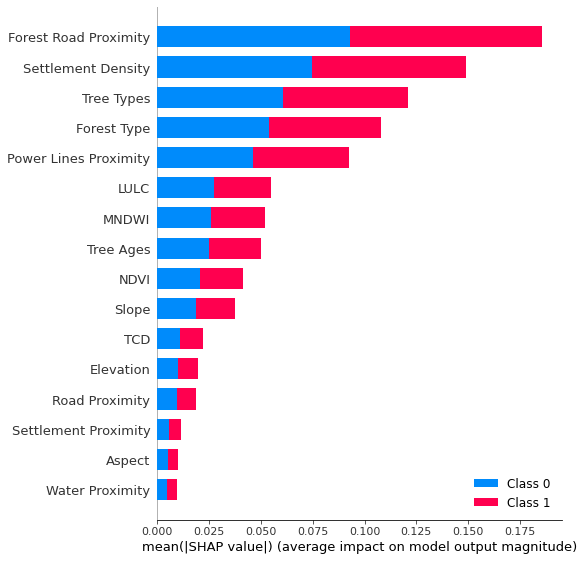

In [15]:
import shap
shap.initjs()

shap_values = shap.TreeExplainer(clf).shap_values(x_train)

shap.summary_plot(shap_values, x_train)

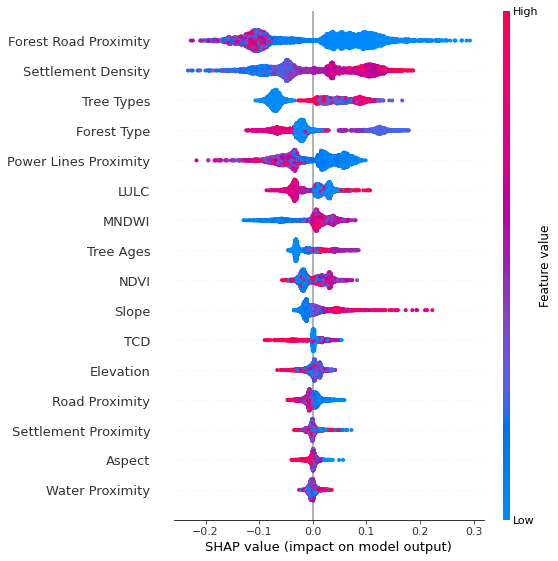

In [17]:
shap.summary_plot(shap_values[1],x_train)